# Compare E3SM Co2 budget for:
## 1) an approximately-month-long simulation with timestep output, 
## 1) an approximately-two-month-long simulation with timestep output, and
## 2) 20-year simulation with monthly output

In previous analysis, there was a small discrepancy between changes in total column-integrated CO2 mass and the time-integrated emission fluxes. To determine what is causing the discrepancy, we want to see if it is still there when we look at individual timesteps over an entire month.


#### Data sources

**Model**: e3sm test_co2 run for 40 days with precipitation output for checking the budget
* runscript (`test_co2_hist_files_ne4pg2_timestepmonthbudget.sh`), with options  
    ○ casename=test_co2_hist_files_ne4pg2_timestepmonthbudget  
    ○ --compset FC5AV1C-04P2  
    ○ --res ne4pg2_ne4pg2  
    ○ CAM_CONFIG_OPTS="-co2_cycle"  
    ○ RUN_STARTDATE=1950-01-01  
    ○ STOP_N=40  
    ○ RESUBMIT=0  
    ○ STOP_OPTION=ndays
* namelist options:  
    ○ nhtfrq = 1  
* History files concatenated using `ncrcat -h -v` 

**Model**: e3sm test_co2 run for 70 days with precipitation output for checking the budget
* runscript (`test_co2_hist_files_ne4pg2_timestepmonthbudget.sh`), with options  
    ○ casename=test_co2_hist_files_ne4pg2_timestepmonthbudget  
    ○ --compset FC5AV1C-04P2  
    ○ --res ne4pg2_ne4pg2  
    ○ CAM_CONFIG_OPTS="-co2_cycle"  
    ○ RUN_STARTDATE=1950-01-01  
    ○ STOP_N=70  
    ○ RESUBMIT=0  
    ○ STOP_OPTION=ndays
* namelist options:  
    ○ nhtfrq = 1  
* History files concatenated using `ncrcat -h -v` 

**Model**: e3sm test_co2 run for 20 years with precipitation output for checking the budget
* runscript (`test_co2_hist_files_ne4pg2_longbudget.sh`), with options  
    ○ casename=test_co2_hist_files_ne4pg2_longbudget  
    ○ --compset FC5AV1C-04P2  
    ○ --res ne4pg2_ne4pg2  
    ○ CAM_CONFIG_OPTS="-co2_cycle"  
    ○ RUN_STARTDATE=1950-01-01  
    ○ STOP_N=10  
    ○ RESUBMIT=1  
    ○ STOP_OPTION=nyears  
* History files concatenated using `ncrcat -h -v`  

#### Changes

- 2020 September: Created  

#### Style notes

<br>
<i>Note these header symbols for marking status:</i>
<li> 🟩 means section is still in progress </li>
<li> ✅ means section has been completed </li>
<br>
<i>Note these naming conventions:</i>
<li> <code>arr_</code> means a numpy array </li>
<li> <code>ds_</code> means an xArray DataSet </li>
<li> <code>da_</code> means a xArray DataArray </li>
<li> <code>df_</code> means a pandas DataFrame </li>

## Setup

In [1]:
import os
from textwrap import wrap

In [2]:
import datetime as dt
from datetime import date

today = date.today()

In [3]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import xarray as xr

In [4]:
import matplotlib
from matplotlib import cm
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap

import seaborn as sns

In [5]:
import altair as alt
import altair_saver

***Set up plotting fonts and use latex formatting***

In [6]:
# rc('text', usetex=True)# use latex for font rendering
matplotlib.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Sans serif"]})
matplotlib.rcParams.update({'font.size': 18})

In [7]:
import re

def tex_escape(text):
    """
        :param text: a plain text message
        :return: the message escaped to appear correctly in LaTeX
    """
    conv = {
        '&': r'\&',
        '%': r'\%',
        '$': r'\$',
        '#': r'\#',
        '_': r'\_',
        '{': r'\{',
        '}': r'\}',
        '~': r'\textasciitilde{}',
        '^': r'\^{}',
        '\\': r'\textbackslash{}',
        '<': r'\textless{}',
        '>': r'\textgreater{}',
    }
    regex = re.compile('|'.join(re.escape(str(key)) for key in sorted(conv.keys(), key = lambda item: - len(item))))
    return regex.sub(lambda match: conv[match.group()], text)

##### For reducing code duplication, let's use some elsewhere-defined functions

In [8]:
import types
import importlib.machinery
loader = importlib.machinery.SourceFileLoader("dkpy", "/global/homes/d/dekauf/notebooks/dkpy.py")
dkpy = types.ModuleType(loader.name)
loader.exec_module(dkpy)

## Data import

In [9]:
datadir  = '/global/homes/d/dekauf/e3sm_output/'
nat_file1 = 'test_co2_hist_files_ne4pg2_timestepmonthbudget_record.CO2.nc'
nat_file2 = 'test_co2_hist_files_ne4pg2_timestep2monthbudget_record.CO2.nc'
nat_file3 = 'test_co2_hist_files_ne4pg2_longbudget_record.CO2.nc'
# rgr_file = 'test_co2_hist_files_take3_rgr_cmip6_180x360_record.CO2.nc'

In [10]:
ds_timestep40 = xr.open_dataset(datadir + nat_file1, decode_times=False)
# dispaly(ds_timestep)

In [11]:
ds_timestep70 = xr.open_dataset(datadir + nat_file2, decode_times=False)
# display(ds_longbudget)

In [12]:
ds_longbudget = xr.open_dataset(datadir + nat_file3, decode_times=False)
# display(ds_longbudget)

## Wrangling

**Convert E3SM $CO_2$ $kg/kg$ to $ppm$**

In [13]:
ds_timestep40 = dkpy.convert_co2_to_ppm(ds_timestep40)
ds_timestep70 = dkpy.convert_co2_to_ppm(ds_timestep70)
ds_longbudget = dkpy.convert_co2_to_ppm(ds_longbudget)

dkpy.co2_summary(ds_timestep40)
dkpy.co2_summary(ds_timestep70)
dkpy.co2_summary(ds_longbudget)

min: 365.6585976125703
mean: 369.4914201278495
max: 379.2289999081871
shape: (961, 384)
min: 365.6585976125703
mean: 369.52574053490827
max: 379.90113016727395
shape: (1681, 384)
min: 366.8546772449775
mean: 379.5206312795495
max: 407.1286956201845
shape: (240, 384)


**Global means with weighting by area**

xarray has recently introduced a weighting method (http://xarray.pydata.org/en/stable/examples/area_weighted_temperature.html).  The area of each grid cell for the ne4pg2/ne30pg2 grids is called “area_p”.  For the ne4/ne30 grids it is just called “area”.  Not sure why they changed it.

\begin{align*}
    && \texttt{glmean_CO2var}_{t}= & \frac{\sum_{i=1}^{nlat}\sum_{j=1}^{nlon} \texttt{CO2var}_{i,j,t} * \texttt{area}_{i,j}}{\sum_{i=1}^{nlat}\sum_{j=1}^{nlon} \texttt{area}_{i,j}}     &&\forall t, \\
    with\,units: && \{kg/m^2\}_t= & \frac{\sum_{i=1}^{nlat}\sum_{j=1}^{nlon} \{kg/{m^2}\}_{i,j,t} * \{m^2/m^2\}_{i,j}}{\sum_{i=1}^{nlat}\sum_{j=1}^{nlon} \{m^2/m^2\}_{i,j}}     &&\forall t. \\
\end{align*}

*notes:*
- we would need to multiply by the radius of Earth ($R^2_{E}$ in units of $\{m^2\}$) to get to $kg$ because `area` is in steradians rather than $m^2$.
- the above multiplication by `area` ($m^2/m^2$) is taken care of in the xarray.DataArray.weighted() method.

In [14]:
var_list = ['CO2', 'AFCO2', 'TAFCO2',
 'SFCO2', 'SFCO2_FFF', 'SFCO2_LND', 'SFCO2_OCN',
 'TMCO2', 'TMCO2_FFF', 'TMCO2_LND', 'TMCO2_OCN']

ds_timestep40 = dkpy.add_global_mean_vars(ds_timestep40, variable_list=var_list, prefix='glmean_',
                                          weighting_var='area_p', averaging_dims=('ncol'))
ds_timestep70 = dkpy.add_global_mean_vars(ds_timestep70, variable_list=var_list, prefix='glmean_',
                                          weighting_var='area_p', averaging_dims=('ncol'))
ds_longbudget = dkpy.add_global_mean_vars(ds_longbudget, variable_list=var_list, prefix='glmean_',
                                     weighting_var='area_p', averaging_dims=('ncol'))

**$\Delta{mass_{CO_2}}$ - change in mass of $CO_2$ from timestep to timestep**

\begin{align*}
    && \Delta \texttt{glmean_TMCO2}_{t} = \texttt{glmean_TMCO2}_{t} - \texttt{glmean_TMCO2}_{t-1} && \forall t
\end{align*}

In [15]:
ds_timestep40['deltas_TMCO2_FFF'] = xr.DataArray(dkpy.calc_var_deltas(ds_timestep40['glmean_TMCO2_FFF']),
                                                 coords={'time': ds_timestep40['time']}, dims=['time'])
ds_timestep70['deltas_TMCO2_FFF'] = xr.DataArray(dkpy.calc_var_deltas(ds_timestep70['glmean_TMCO2_FFF']), 
                                                 coords={'time': ds_timestep70['time']}, dims=['time'])
ds_longbudget['deltas_TMCO2_FFF'] = xr.DataArray(dkpy.calc_var_deltas(ds_longbudget['glmean_TMCO2_FFF']), 
                                                 coords={'time': ds_longbudget['time']}, dims=['time'])

**$\int{flux_{CO_2}}$ - time-integrated flux of $CO_2$ from surface emissions and aircraft**

\begin{align*}
    && \int_{t-1}^{t} \texttt{SFCO2} \approx & \texttt{glmean_SFCO2}_{t} & * & \quad (time_t - time_{t-1})    &&\forall t, \\
    with\,units: && \{kg/m^2\}_t= & \{kg/m^2/s\}_t& * & \quad \{s\}_{t}    &&\forall t. \\
\end{align*}


In [16]:
def calc_time_integrated_fluxes(xr_ds_):
    dtime = dkpy.calc_time_deltas(xr_ds_)
    #
    da_int_sfco2 = xr.DataArray(xr_ds_['glmean_SFCO2'] * dtime, 
                                 coords={'time': xr_ds_['time']}, dims=['time'])
    #
    da_int_aircraftco2 = xr.DataArray(xr_ds_['glmean_TAFCO2'] * dtime, 
                                 coords={'time': xr_ds_['time']}, dims=['time'])
    #
    da_int_totalemissionsflux = xr.DataArray(da_int_sfco2 + da_int_aircraftco2, 
                                 coords={'time': xr_ds_['time']}, dims=['time'])
    
    
    return da_int_totalemissionsflux, da_int_sfco2, da_int_aircraftco2

In [17]:
(ds_timestep40['timeint_TOTALFLUX'], 
 ds_timestep40['timeint_SFCO2'],
 ds_timestep40['timeint_TACO2']) = calc_time_integrated_fluxes(ds_timestep40)

(ds_timestep70['timeint_TOTALFLUX'], 
 ds_timestep70['timeint_SFCO2'],
 ds_timestep70['timeint_TACO2']) = calc_time_integrated_fluxes(ds_timestep70)

(ds_longbudget['timeint_TOTALFLUX'], 
 ds_longbudget['timeint_SFCO2'],
 ds_longbudget['timeint_TACO2']) = calc_time_integrated_fluxes(ds_longbudget)

# Compare values at first monthly output

Does the timestep budget equal the monthly budget for the instant at day 31?

In [19]:
tempa = all(ds_timestep40['TMCO2_FFF'].where(ds_timestep40['time'] == 31, drop=True).squeeze() == \
            ds_longbudget['TMCO2_FFF'].where(ds_longbudget['time'] == 31, drop=True).squeeze())

tempb = all(ds_timestep70['TMCO2_FFF'].where(ds_timestep70['time'] == 31, drop=True).squeeze() == \
            ds_longbudget['TMCO2_FFF'].where(ds_longbudget['time'] == 31, drop=True).squeeze())

print(tempa)
print(tempb)

True
True


Does averaging the timestep budget for the first month give us the same value as the monthly output from the 20-year run?

In [20]:
tempa = all(ds_timestep40['TMCO2'].where(ds_timestep40['time'] <= 31, drop=True
                         ).mean(dim=('time')) == \
            ds_longbudget['TMCO2'].where(ds_longbudget['time'] == 31, drop=True
                         ).squeeze()
           )

tempb = all(ds_timestep70['TMCO2'].where(ds_timestep70['time'] <= 31, drop=True
                         ).mean(dim=('time')) == \
            ds_longbudget['TMCO2'].where(ds_longbudget['time'] == 31, drop=True
                         ).squeeze()
           )

print(tempa)
print(tempb)

True
True


Does summing the timestep fluxes for the first month give us the same value as the monthly output from the 20-year run?

In [85]:
a = ds_timestep['timeint_SFCO2'].where(ds_timestep['time_bnds'].isel(nbnd=1) <= 31, drop=True
                               ).sum().values

b = ds_longbudget['timeint_SFCO2'].isel(time=31).values

print(a==b)
print(f"a == {a}")
print(f"b == {b}")

False
a == 0.0012532256962645154
b == 0.0009612999292399833


In [23]:
seconds_per_day = 24 * 60 * 60

def first_31day_sum(x_ds_, deltatime_da_):
    temp_da = xr.DataArray(x_ds_['glmean_TAFCO2'] * deltatime_da_, 
                 coords={'time': x_ds_['time']}, dims=['time'])
    
    return temp_da.where(x_ds_['time_bnds'].isel(nbnd=1) <= 31, drop=True
                 ).sum().values

temp_dtime = (ds_timestep40['time_bnds'].diff('nbnd') * seconds_per_day).astype('float').isel(nbnd=0).round()
# display(temp_dtime)
a = first_31day_sum(ds_timestep40, temp_dtime)

temp_dtime = (ds_timestep40['time_bnds'].diff('nbnd') * seconds_per_day).astype('float').isel(nbnd=0).round()
temp_dtime[0] = 3600.
# display(temp_dtime)
b = first_31day_sum(ds_timestep40, temp_dtime)

temp_dtime = (ds_timestep40['time_bnds'].diff('nbnd').astype('int') * seconds_per_day).isel(nbnd=0)
c = first_31day_sum(ds_timestep40, temp_dtime)

print(a)
print(b)
print(c)

1.0389867117537448e-05
1.040331653764919e-05
0.0


In [22]:
# all(ds_timestep['deltas_TMCO2_FFF'].where(ds_timestep['time'] == 31, drop=True).squeeze() == \
#     ds_longbudget['deltas_TMCO2_FFF'].where(ds_longbudget['time'] == 31, drop=True).squeeze())

# Visualizations

#### Mean global CO2 mass (`glmean_TMCO2...`)

In [77]:
ds_longbudget['time'].isel(time=slice(None, 40)).where(ds_longbudget['time'] < 40, drop=True).values.astype(int)

array([31])

In [82]:
ds_longbudget['time']

<xarray.DataArray 'time' (time: 240)>
array([  31.,   59.,   90., ..., 7239., 7269., 7300.])
Coordinates:
  * time     (time) float64 31.0 59.0 90.0 120.0 ... 7.239e+03 7.269e+03 7.3e+03
Attributes:
    long_name:  time
    units:      days since 1950-01-01 00:00:00
    calendar:   noleap
    bounds:     time_bnds

In [81]:
ds_longbudget['glmean_TMCO2_FFF'].isel(time=slice(None, 40))

<xarray.DataArray 'glmean_TMCO2_FFF' (time: 40)>
array([5.62951616, 5.63061001, 5.63172479, 5.6327004 , 5.63361856,
       5.63448151, 5.63537259, 5.63627156, 5.63713891, 5.63810399,
       5.63916051, 5.64042273, 5.64178593, 5.64296206, 5.64415914,
       5.64520587, 5.64618859, 5.64711031, 5.6480608 , 5.64901995,
       5.64994723, 5.65098134, 5.65211525, 5.65346001, 5.65485638,
       5.65605531, 5.65727598, 5.65834372, 5.65934546, 5.66028344,
       5.66124971, 5.6622251 , 5.66317006, 5.66422559, 5.66538269,
       5.66675455, 5.66818943, 5.66942283, 5.67067927, 5.67177819])
Coordinates:
  * time     (time) float64 31.0 59.0 90.0 ... 1.154e+03 1.185e+03 1.215e+03

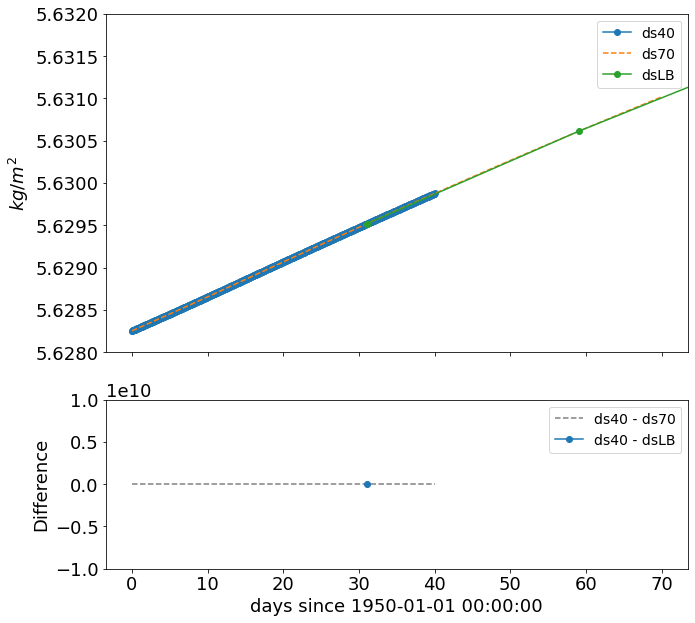

In [103]:
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(10, 9), gridspec_kw={'height_ratios': [2, 1]})

axs[0].plot(ds_timestep40['time'], ds_timestep40['glmean_TMCO2_FFF'], 
        '-o', label='ds40')
axs[0].plot(ds_timestep70['time'], ds_timestep70['glmean_TMCO2_FFF'], 
        '--', label='ds70')
axs[0].plot(ds_longbudget['time'], ds_longbudget['glmean_TMCO2_FFF'], 
        '-o', label='dsLB')
#
axs[0].set_xlim((-3.5, 73.5))
axs[0].set_ylim((5.628, 5.632))
axs[0].set_ylabel(f"$kg/m^2$")
axs[0].legend(fontsize=14)

dif1 = ds_timestep40['glmean_TMCO2_FFF'].where(ds_timestep40['time'] <= 40, drop=True) - \
        ds_timestep70['glmean_TMCO2_FFF'].where(ds_timestep70['time'] <= 40, drop=True)
dif2 = ds_timestep40['glmean_TMCO2_FFF'].where(ds_timestep40['time'] == 31, drop=True) - \
        ds_longbudget['glmean_TMCO2_FFF'].where(ds_longbudget['time'] == 31, drop=True)
axs[1].plot(ds_timestep40['time'].where(ds_timestep40['time'] <= 40, drop=True), dif1, 
            '--', color='gray', label='ds40 - ds70')
axs[1].plot([31], dif2, 
            marker='o', label='ds40 - dsLB')
axs[1].set_xlabel(f"{ds_longbudget['time'].attrs['units']}")
axs[1].set_ylabel(f"Difference")
axs[1].legend(fontsize=14)
axs[1].set_ylim((-1e10, 1e10))

plt.tight_layout()

In [29]:
def plot_co2_global_mean_mass(xr_ds_, idx_startstop=slice(None, None)):
    sns.set_style("whitegrid", {'grid.linestyle': '--'})
    fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(10, 7), gridspec_kw={'height_ratios': [2, 1]})

    xv = xr_ds_['time'].isel(time=idx_startstop)
    
    axs[0].plot(xv, xr_ds_['glmean_TMCO2'].isel(time=idx_startstop), '-', label='$TMCO_2$')
    axs[0].plot(xv, xr_ds_['gl
                           mean_TMCO2_FFF'].isel(time=idx_startstop), label='$TMCO_2\_FFF$')
    axs[0].set_ylabel(f"$kg/m^2$")
    axs[0].legend()

    axs[1].plot(xv, xr_ds_['glmean_TMCO2'].isel(time=idx_startstop) - xr_ds_['glmean_TMCO2_FFF'].isel(time=idx_startstop), 
                '-', color='gray', label='Difference ($TMCO_2$ - $TMCO_2\_FFF$)')
    axs[1].set_xlabel(f"{xv.attrs['units']}")
    axs[1].set_ylabel(f"$kg/m^2$")
    axs[1].legend(fontsize=14)

    plt.tight_layout()

In [47]:
def plot_changes_in_co2_mass(xr_ds_, 
                             idx_startstop=slice(1, None), 
                             deltas_var='deltas_TMCO2_FFF',
                             plot_label=("$\Delta$" + tex_escape('glmean_TMCO2_FFF'))):
    fig, ax = plt.subplots(figsize=(10, 5))

    ax.plot(xr_ds_['time'].isel(time=idx_startstop), 
            xr_ds_[deltas_var].isel(time=idx_startstop), 
            '-o', label=plot_label)
    #
    ax.set_xlabel(f"{xr_ds_['time'].attrs['units']}")
    ax.set_ylabel(f"$kg/m^2$")
    ax.legend(fontsize=14)

    plt.tight_layout()

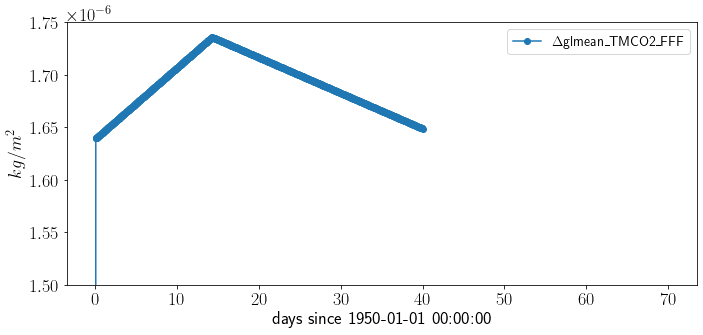

In [49]:
plot_changes_in_co2_mass(ds_timestep40, idx_startstop=slice(None, None))
plt.ylim((1.5e-6, 1.75e-6))
plt.xlim((-3.5, 73.5))
plt.show()

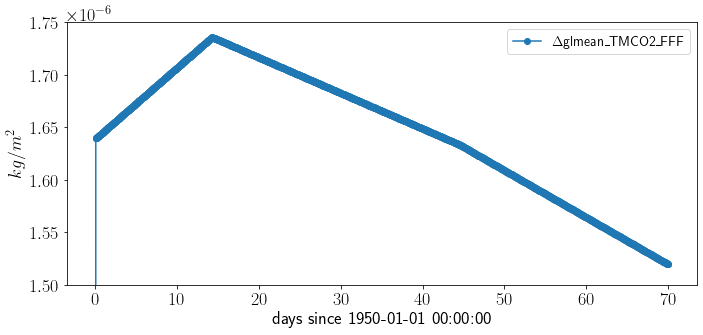

In [50]:
plot_changes_in_co2_mass(ds_timestep70, idx_startstop=slice(None, None))
plt.ylim((1.5e-6, 1.75e-6))
plt.xlim((-3.5, 73.5))
plt.show()

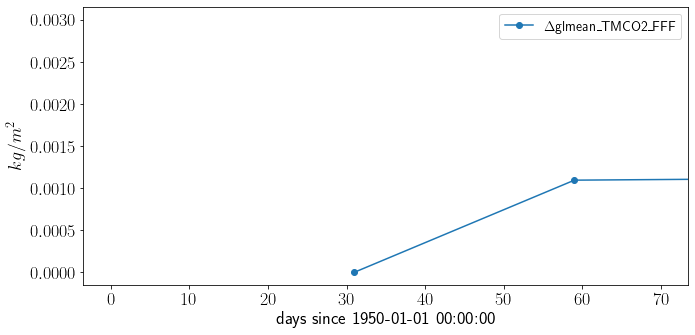

In [51]:
plot_changes_in_co2_mass(ds_longbudget, idx_startstop=slice(None, None))
# plt.ylim((1.5e-6, 1.75e-6))
plt.xlim((-3.5, 73.5))
plt.show()

#### Mean global CO2 surface flux(`glmean_SFCO2...`)

In [56]:
def plot_co2_global_mean_sufaceflux(xr_ds_, idx_startstop=slice(None, None)):
    fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(10, 7), gridspec_kw={'height_ratios': [2, 1]})
    
    xv = xr_ds_['time'].isel(time=idx_startstop)
    
    axs[0].plot(xv, xr_ds_['glmean_SFCO2'].isel(time=idx_startstop), '-o', label='$SFCO_2$')
    axs[0].plot(xv, xr_ds_['glmean_SFCO2_FFF'].isel(time=idx_startstop), label='$SFCO_2\_FFF$')
    axs[0].set_ylabel(f"$kg/m^2/s$")
    axs[0].legend()

    axs[1].plot(xv, xr_ds_['glmean_SFCO2'].isel(time=idx_startstop) - xr_ds_['glmean_SFCO2_FFF'].isel(time=idx_startstop), 
                color='gray', label='Difference ($SFCO_2$ - $SFCO_2\_FFF$)')
    axs[1].set_xlabel(f"{xv.attrs['units']}")
    axs[1].set_ylabel(f"$kg/m^2/s$")
    axs[1].legend(fontsize=14)

    plt.tight_layout()
    plt.show()

In [25]:
df = pd.DataFrame.from_dict({'time': ds_longbudget['time'],
                             'SFCO2': ds_longbudget['glmean_SFCO2'],
                             'SFCO2_FFF': ds_longbudget['glmean_SFCO2']})

base_chart = alt.Chart(df, width=600, height=200
                      ).transform_fold(['SFCO2', 'SFCO2_FFF'], as_=['key_fold', 'value_fold']
                      ).mark_line(point=True
                      ).encode(
    x=alt.X('time:Q'),
    y=alt.Y('value_fold:Q', axis=alt.Axis(tickCount=6, format=".1e")),
    color=alt.Color('key_fold:N'),
    strokeDash=alt.condition(
        alt.datum.key_fold == 'SFCO2_FFF',
        alt.value([5, 5]),  # dashed line: 5 pixels  dash + 5 pixels space
        alt.value([0]),  # solid line
    )
)
base_chart

alt.Chart(...)

Here is the difference between including and not including the aircraft fluxes...

In [29]:
# fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(10, 7), gridspec_kw={'height_ratios': [2, 1]})

# axs[0].plot(ds['time'], arr_int_sfco2, '--', 
#             label="$\int$" + tex_escape('glmean_SFCO2_FFF'))
# axs[0].plot(ds['time'], arr_int_totalemissionsflux, '-',
#             label="$\int$" + tex_escape('(glmean_SFCO2_FFF + glmean_TACO2)'))
# axs[0].set_ylabel(f"$kg/m^2$")
# axs[0].legend(fontsize=14)

# axs[1].plot(ds['time'], arr_int_sfco2-arr_int_totalemissionsflux, color='gray', label='Difference')
# axs[1].set_xlabel(f"{ds['time'].attrs['units']}")
# axs[1].set_ylabel(f"$kg/m^2$")
# axs[1].legend(fontsize=14)

# plt.tight_layout()
# plt.show()

#### Comparing $\Delta{mass_{CO_2}}$ with $\int{flux_{CO_2}}$

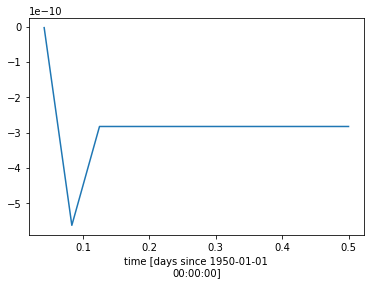

In [86]:
(ds_timestep['deltas_TMCO2_FFF'] - ds_timestep['timeint_TOTALFLUX']
)[1:13].plot()

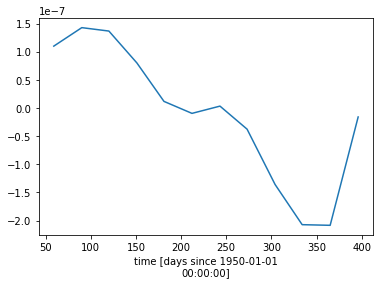

In [87]:
(ds_longbudget['deltas_TMCO2_FFF'] - ds_longbudget['timeint_TOTALFLUX']
)[1:13].plot()

Adding a little more to the plot:

In [ ]:
ds_longbudget['time']

In [84]:
ds_timestep['TMCO2'].sel(time=0)

<xarray.DataArray 'TMCO2' (ncol: 384)>
array([5.751147, 5.795683, 5.66854 , ..., 5.439391, 5.703333, 5.690783])
Coordinates:
    time     float64 0.0
Dimensions without coordinates: ncol
Attributes:
    units:         kg/m2
    long_name:     CO2 column burden
    cell_methods:  time: mean

In [58]:
def plot_difference_deltaTMCO2_and_timeintFLUX_1(xr_ds_, idx_startstop=slice(1, 13)):
    fig, axs = plt.subplots(nrows=4, sharex=True, figsize=(10, 9), gridspec_kw={'height_ratios': [2, 1, 1, 1]})
    
    xv = xr_ds_['time'].isel(time=idx_startstop)
    
    axs[0].plot(xv, xr_ds_['deltas_TMCO2_FFF'].isel(time=idx_startstop), '-o', 
             label="$\Delta mass$" + tex_escape(' (glmean_TMCO2_FFF)'))
    axs[0].plot(xv, xr_ds_['timeint_TOTALFLUX'].isel(time=idx_startstop), '-', 
             label="$\int flux$" + tex_escape(' (glmean_SFCO2_FFF + glmean_TACO2)'))
    axs[0].set_ylabel(f"$kg/m^2$")
    axs[0].legend(fontsize=14)

    axs[1].plot(xv, 
                (xr_ds_['deltas_TMCO2_FFF'].isel(time=idx_startstop).values - xr_ds_['timeint_TOTALFLUX'].isel(time=idx_startstop).values), 
                '-o', color='gray', label="Difference ($\Delta mass - \int flux$)")
    axs[1].set_ylabel(f"$kg/m^2$")
    axs[1].legend(fontsize=14)

    axs[2].plot(xv, xr_ds_['timeint_TACO2'].isel(time=idx_startstop), '--', color='purple', 
             label="$\int flux$" + tex_escape(' (glmean_TACO2)'))
    axs[2].set_ylabel(f"$kg/m^2$")
    axs[2].legend(fontsize=14)

    axs[3].plot(xv, xr_ds_['timeint_SFCO2'].isel(time=idx_startstop), '--', color='green',
            label="$\int flux$" + tex_escape(' (glmean_SFCO2_FFF)'))
    axs[3].set_ylabel(f"$kg/m^2$")
    axs[3].legend(fontsize=14)
    axs[3].set_xlabel(f"{xr_ds_['time'].attrs['units']}")

    plt.tight_layout()
    plt.show()

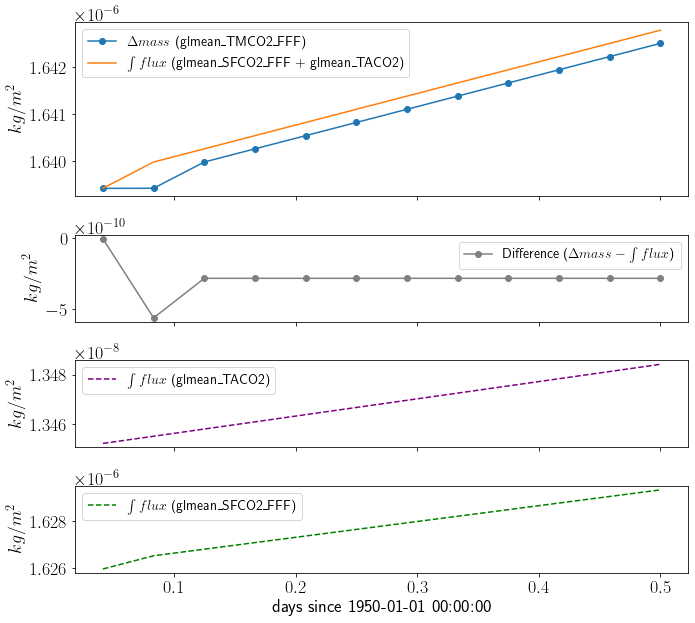

In [92]:
plot_difference_deltaTMCO2_and_timeintFLUX_1(ds_timestep, idx_startstop=slice(1, 13))

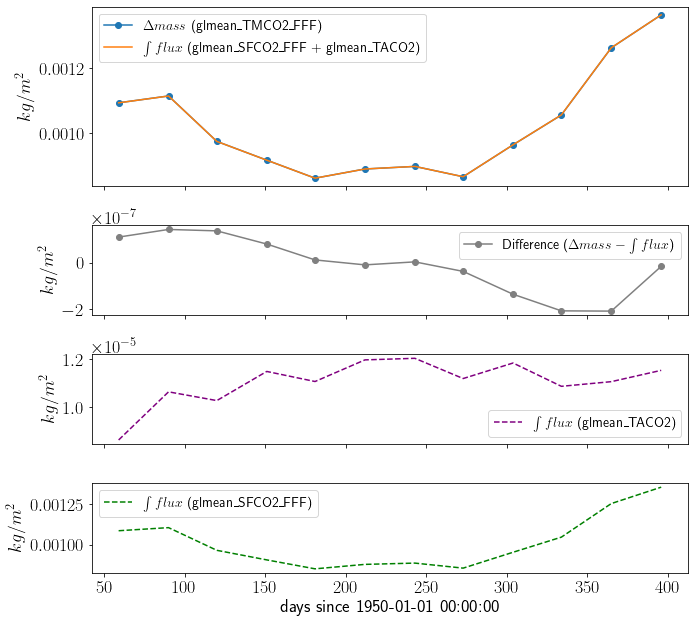

In [91]:
plot_difference_deltaTMCO2_and_timeintFLUX_1(ds_longbudget, idx_startstop=slice(1, 13))

In [ ]:
askdjhg

Surface flux vs fossil fuel only surface flux

In [64]:
def plot_surfaceflux_vs_fffonly(xr_ds_, idx_startstop=slice(1, 13)):
    fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(10, 7), gridspec_kw={'height_ratios': [2, 1]})

    xv = xr_ds_['time'].isel(time=idx_startstop)
    
    axs[0].plot(xv, xr_ds_['glmean_SFCO2'].isel(time=idx_startstop), '-o', label='$SFCO_2$')
    axs[0].plot(xv, xr_ds_['glmean_SFCO2_FFF'].isel(time=idx_startstop), label='$SFCO_2\_FFF$')
    axs[0].set_ylabel(f"$kg/m^2/s$")
    axs[0].legend()

    axs[1].plot(xv, xr_ds_['glmean_SFCO2'].isel(time=idx_startstop) - xr_ds_['glmean_SFCO2_FFF'].isel(time=idx_startstop), 
                color='gray', label='Difference')
    axs[1].set_xlabel(f"{xv.attrs['units']}")
    axs[1].set_ylabel(f"$kg/m^2/s$")
    axs[1].legend()

    plt.tight_layout()
    plt.show()

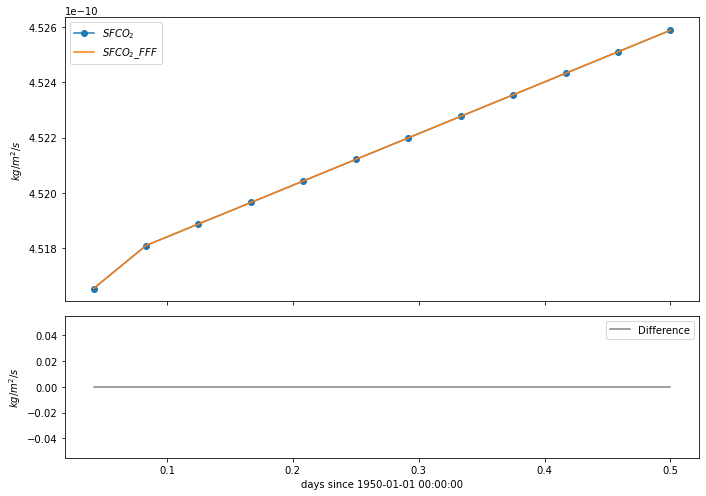

In [68]:
plot_surfaceflux_vs_fffonly(ds_timestep, idx_startstop=slice(1, 13))

In [76]:
temp_dtime = dkpy.calc_time_deltas(ds_longbudget)
tempa   = ((ds_longbudget['glmean_SFCO2'] + ds_longbudget['glmean_TAFCO2']) * temp_dtime).isel(time=slice(1,13))
tempb   = ds_longbudget['glmean_TMCO2_FFF'].diff('time').isel(time=slice(1,13))
tot_err_nat_longbudget = tempb - tempa
rel_err_nat_longbudget = (tempb - tempa) / tempb

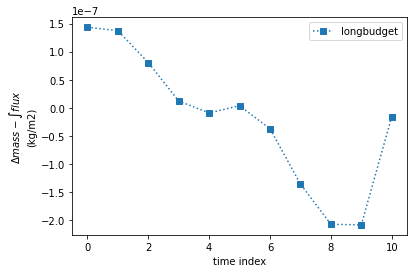

In [77]:
plt.plot(tot_err_nat_longbudget, ':s', label="longbudget")
plt.xlabel("time index")
plt.ylabel("$\Delta mass - \int flux$\n(kg/m2)")
plt.legend()
plt.show()
